In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno
import warnings
import joblib
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.arima.model import ARIMA

#Makine Öğrenmesi 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [2]:
df_ = pd.read_excel("MarketSales.xlsx")

In [3]:
df = df_.copy()

In [4]:
df.head()

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,BRANCH,SALESMAN,CITY,REGION,LATITUDE,LONGITUDE,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER
0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,2.00,1.85,52.0,Kocaeli Subesi,Eyüp CİNE,Kocaeli,Marmara,40.8533,29.8815,467369,Sercan KIZILOK,156,SPRİTE,İÇECEK,GAZLI İÇECEK,GAZOZ,2017-01-08 16:16:11,2017-01-08 16:17:13,E
1,10537.0,8.0,TOZ SEKER,18105,2017-01-06,5.0,2.65,13.25,12.27,8.0,Antalya Subesi,İlhan ÖRENLİ,Antalya,Akdeniz,36.8841,30.7056,131464,İsmet ŞINGIR,NaN,NaN,İÇECEK,ÇAY KAHVE,SEKER TATLANDIRICI,2017-01-07 11:04:34,2017-01-07 11:05:37,E
2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,İstanbul Subesi,İsmet SARTIK,İstanbul,Marmara,41.0053,28.9770,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,40.0,İstanbul Subesi,İsmet SARTIK,İstanbul,Marmara,41.0053,28.9770,656969,Yağız KUBAL,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-04 14:00:03,2017-01-04 14:01:01,E
4,10115.0,12808.0,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,0.40,0.37,41.0,İzmir Subesi,Gülten IŞLAK,İzmir,Ege,38.4189,27.1287,447336,Habibe AYSAN,300,FALIM,GIDA,SAKIZ SEKERLEME,SAKIZ,2017-01-06 14:00:30,2017-01-06 14:01:03,K


In [59]:
df.shape

(611108, 28)

In [6]:
def check_data(dataframe, head=5):
    print("SHAPE".center(70, "-"))
    print("Rows: {}".format(dataframe.shape[0]))
    print("Columns: {}".format(dataframe.shape[1]))
    print("TYPES".center(70, "-"))
    print(dataframe.dtypes)
    print("HEAD".center(70, "-"))
    print(dataframe.head(head))
    print("TAIL".center(70, "-"))
    print(dataframe.tail(head))
    print("MISSING VALUES".center(70, "-"))
    print(dataframe.isnull().sum())
    print("DUPLICATED VALUES".center(70, "-"))
    print(dataframe.duplicated().sum())
    print("QUANTILES".center(70, "-"))
    print(dataframe.describe([0, 0.5, 0.95, 1]).T)

check_data(df)

--------------------------------SHAPE---------------------------------
Rows: 611108
Columns: 26
--------------------------------TYPES---------------------------------
ID                       float64
ITEMCODE                 float64
ITEMNAME                  object
FICHENO                    int64
DATE_             datetime64[ns]
AMOUNT                   float64
PRICE                    float64
LINENETTOTAL             float64
LINENET                  float64
BRANCHNR                 float64
BRANCH                    object
SALESMAN                  object
CITY                      object
REGION                    object
LATITUDE                 float64
LONGITUDE                float64
CLIENTCODE                object
CLIENTNAME                object
BRANDCODE                 object
BRAND                     object
CATEGORY_NAME1            object
CATEGORY_NAME2            object
CATEGORY_NAME3            object
STARTDATE         datetime64[ns]
ENDDATE           datetime64[ns]
GENDER  

In [7]:
#Boş değerlerin verinin tümüne göre yüzdelikleri.
missing_data = df.isnull().sum()
missing_percentage= (missing_data[missing_data > 0] / df.shape[0]) *100
missing_percentage.sort_values(ascending=True, inplace=True)
missing_percentage

ID                 0.000164
LONGITUDE          0.000164
LATITUDE           0.000164
REGION             0.000164
BRANCH             0.000164
BRANCHNR           0.000164
LINENET            0.000164
CITY               0.000164
PRICE              0.000164
AMOUNT             0.000164
DATE_              0.000164
LINENETTOTAL       0.000164
ITEMNAME           1.172788
ITEMCODE           1.172788
CATEGORY_NAME1     1.172788
CLIENTCODE         3.002415
CLIENTNAME         3.005197
GENDER             3.005197
CATEGORY_NAME2     4.526205
BRANDCODE          5.818448
BRAND              5.818448
CATEGORY_NAME3    34.275284
dtype: float64

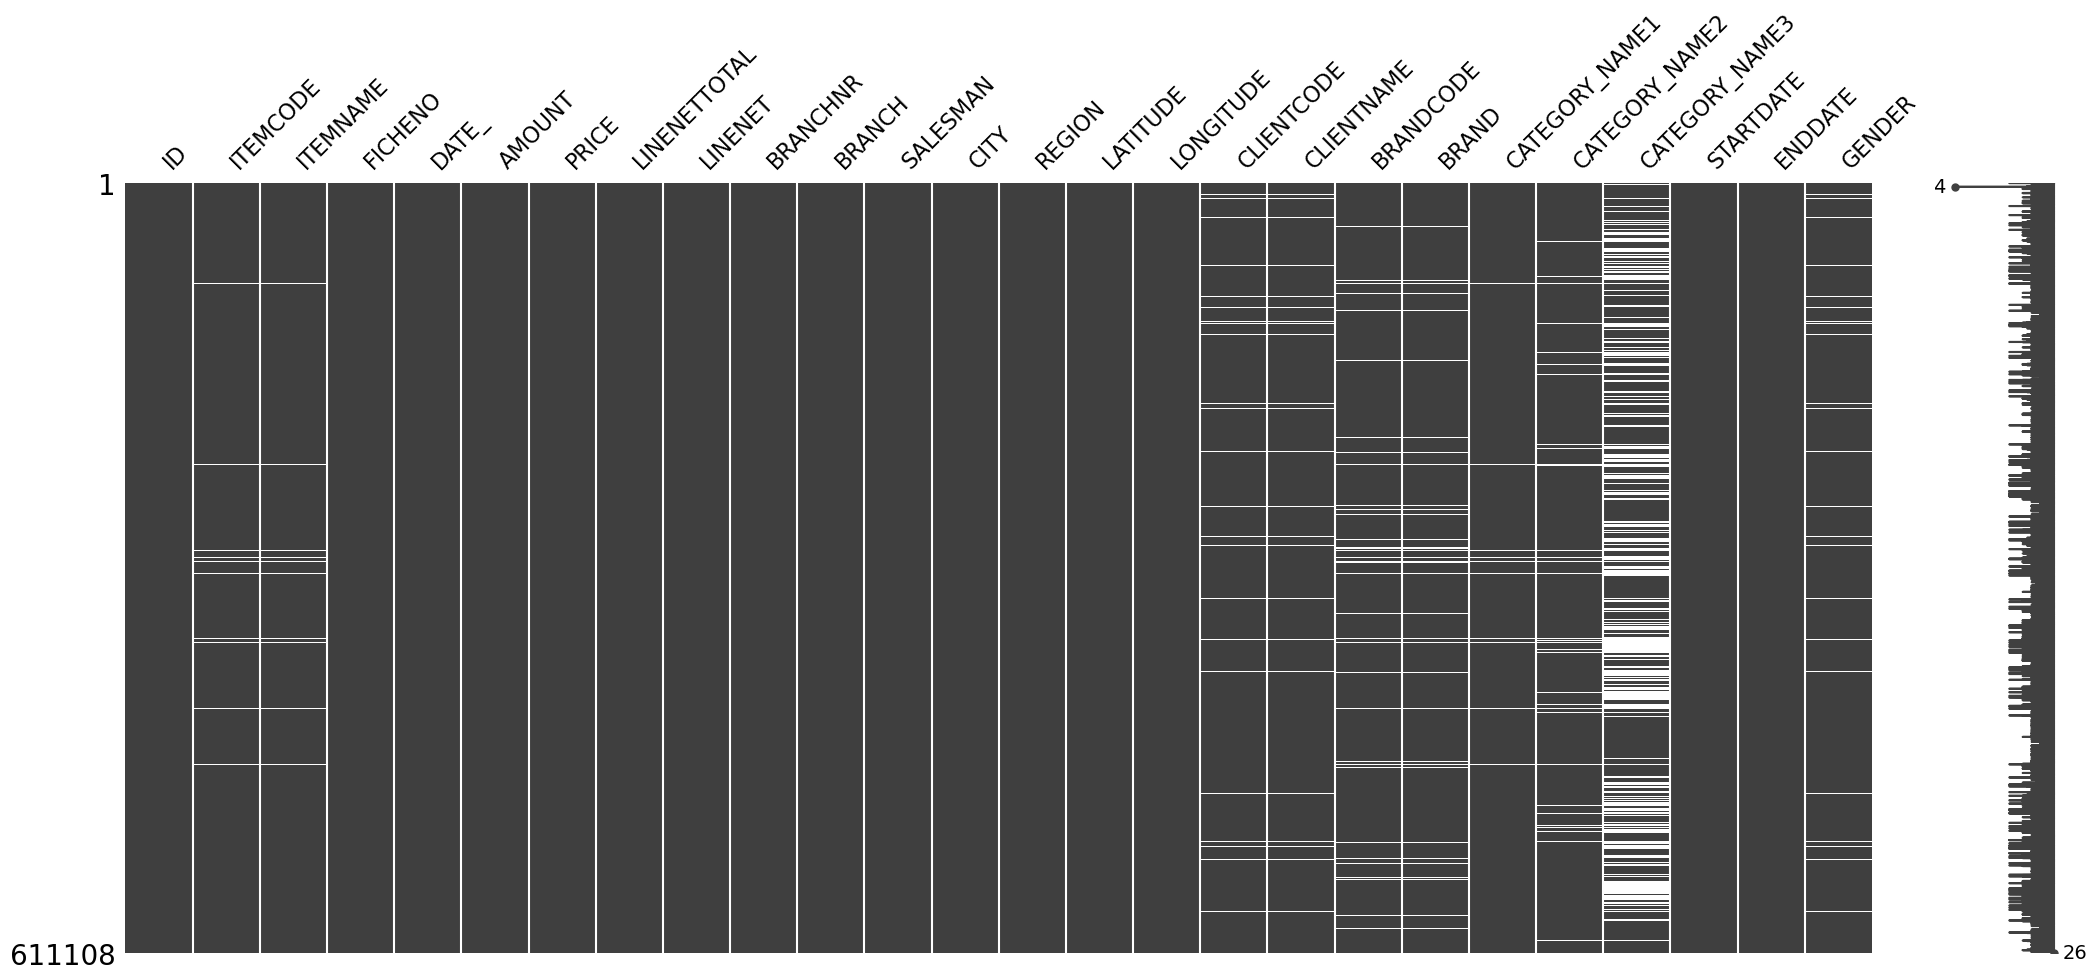

In [9]:
msno.matrix(df);

# VERI TEMIZLIGI

In [5]:
mode_itemcode = df["ITEMCODE"].mode()[0]
mode_itemcode
df["ITEMCODE"].fillna(mode_itemcode, inplace=True)

In [6]:
df["ITEMCODE"] = df["ITEMCODE"].astype("int64")
df.dtypes

ID                       float64
ITEMCODE                   int64
ITEMNAME                  object
FICHENO                    int64
DATE_             datetime64[ns]
AMOUNT                   float64
PRICE                    float64
LINENETTOTAL             float64
LINENET                  float64
BRANCHNR                 float64
BRANCH                    object
SALESMAN                  object
CITY                      object
REGION                    object
LATITUDE                 float64
LONGITUDE                float64
CLIENTCODE                object
CLIENTNAME                object
BRANDCODE                 object
BRAND                     object
CATEGORY_NAME1            object
CATEGORY_NAME2            object
CATEGORY_NAME3            object
STARTDATE         datetime64[ns]
ENDDATE           datetime64[ns]
GENDER                    object
dtype: object

In [7]:
itemcode_to_itemname = df.dropna(subset = ["ITEMNAME"]).drop_duplicates(
    subset=["ITEMCODE"]).set_index("ITEMCODE")["ITEMNAME"].to_dict()

In [8]:
df["ITEMNAME"] = df["ITEMNAME"].fillna(df["ITEMCODE"].map(itemcode_to_itemname))

In [9]:
max_id = int(df["ID"].max())
df.loc[df["ID"].isna(), "ID"] = range(max_id + 1, max_id + 1 + df["ID"].isna().sum())
df["ID"] = df["ID"].astype("int64")


In [11]:
df.notnull().sum()

ID                611108
ITEMCODE          611108
ITEMNAME          611108
FICHENO           611108
DATE_             611107
AMOUNT            611107
PRICE             611107
LINENETTOTAL      611107
LINENET           611107
BRANCHNR          611107
BRANCH            611107
SALESMAN          611108
CITY              611107
REGION            611107
LATITUDE          611107
LONGITUDE         611107
CLIENTCODE        592760
CLIENTNAME        592743
BRANDCODE         575551
BRAND             575551
CATEGORY_NAME1    603941
CATEGORY_NAME2    583448
CATEGORY_NAME3    401649
STARTDATE         611108
ENDDATE           611108
GENDER            592743
dtype: int64

In [10]:
df["CITY"].fillna(df["CITY"].mode()[0], inplace=True)
df["REGION"].fillna(df["REGION"].mode()[0], inplace=True)

In [11]:
df["CLIENTCODE"] = df.groupby(["CITY", "REGION"])["CLIENTCODE"].transform(lambda x: x.fillna(x.mode()[0]))

In [12]:
df["CLIENTCODE"] = pd.to_numeric(df["CLIENTCODE"], errors="coerce")
df["CLIENTCODE"].fillna(0, inplace=True) 
df["CLIENTCODE"] = df["CLIENTCODE"].astype("int64")

In [13]:
def fill_clientname(group):
    mode = group.mode()
    if not mode.empty:
        return group.fillna(mode[0])
    else:
        return group.fillna("Unknown")
df["CLIENTNAME"] = df.groupby("CLIENTCODE")["CLIENTNAME"].transform(fill_clientname)
df["CLIENTCODE"] = df["CLIENTCODE"].astype("category")

In [14]:
df["DATE_"].fillna(df["DATE_"].mode()[0], inplace=True)
df["AMOUNT"].fillna(df["AMOUNT"].mean(), inplace=True)
df["PRICE"].fillna(df["PRICE"].mean(), inplace=True)
df["LINENETTOTAL"].fillna(df["LINENETTOTAL"].mean(), inplace=True)
df["LINENET"].fillna(df["LINENET"].mean(), inplace=True)
df["BRANCHNR"].fillna(df["BRANCHNR"].mode()[0], inplace=True)
df["LATITUDE"].fillna(df["LATITUDE"].mean(), inplace=True)
df["LONGITUDE"].fillna(df["LONGITUDE"].mean(), inplace=True)

In [15]:
df["BRANCH"].fillna(df["BRANCH"].mode()[0], inplace=True)
df["BRANCHNR"] = df["BRANCHNR"].astype("int64")

In [16]:
df["GENDER"] = df.groupby("CITY")["GENDER"].apply(lambda x: x.fillna(x.mode()[0])).reset_index(level=0, drop=True)

In [17]:
df["BRANDCODE"].fillna(1234, inplace=True)

brand_mapping = {
    1234: "BrandA",
    5678: "BrandB",}

df["BRAND"] = df["BRANDCODE"].apply(lambda x: brand_mapping.get(x, "Unknown"))
df["BRANDCODE"] = df["BRANDCODE"].astype("category")

In [18]:
#Kategorilerin arasındaki ilişki
# CATEGORY_NAME1 için en sık geçen kategoriler
category1_counts = df["CATEGORY_NAME1"].value_counts()
#print("CATEGORY_NAME1 için en sık geçen kategoriler:")
#print(category1_counts)

# CATEGORY_NAME2 için en sık geçen kategoriler
category2_counts = df["CATEGORY_NAME2"].value_counts()
#print("CATEGORY_NAME2 için en sık geçen kategoriler:")
#print(category2_counts)

# CATEGORY_NAME3 için en sık geçen kategoriler
category3_counts = df["CATEGORY_NAME3"].value_counts()
#print("CATEGORY_NAME3 için en sık geçen kategoriler:")
#print(category3_counts)

In [19]:
df["CATEGORY_NAME1"].fillna(df["CATEGORY_NAME1"].mode()[0], inplace=True)
df["CATEGORY_NAME2"].fillna(df["CATEGORY_NAME2"].mode()[0], inplace=True)
df["CATEGORY_NAME3"].fillna(df["CATEGORY_NAME3"].mode()[0], inplace=True)

In [22]:
df.isnull().sum()

ID                0
ITEMCODE          0
ITEMNAME          0
FICHENO           0
DATE_             0
AMOUNT            0
PRICE             0
LINENETTOTAL      0
LINENET           0
BRANCHNR          0
BRANCH            0
SALESMAN          0
CITY              0
REGION            0
LATITUDE          0
LONGITUDE         0
CLIENTCODE        0
CLIENTNAME        0
BRANDCODE         0
BRAND             0
CATEGORY_NAME1    0
CATEGORY_NAME2    0
CATEGORY_NAME3    0
STARTDATE         0
ENDDATE           0
GENDER            0
dtype: int64

In [23]:
print(df.dtypes)

ID                         int64
ITEMCODE                   int64
ITEMNAME                  object
FICHENO                    int64
DATE_             datetime64[ns]
AMOUNT                   float64
PRICE                    float64
LINENETTOTAL             float64
LINENET                  float64
BRANCHNR                   int64
BRANCH                    object
SALESMAN                  object
CITY                      object
REGION                    object
LATITUDE                 float64
LONGITUDE                float64
CLIENTCODE              category
CLIENTNAME                object
BRANDCODE               category
BRAND                     object
CATEGORY_NAME1            object
CATEGORY_NAME2            object
CATEGORY_NAME3            object
STARTDATE         datetime64[ns]
ENDDATE           datetime64[ns]
GENDER                    object
dtype: object


# VERI DONUSTURME

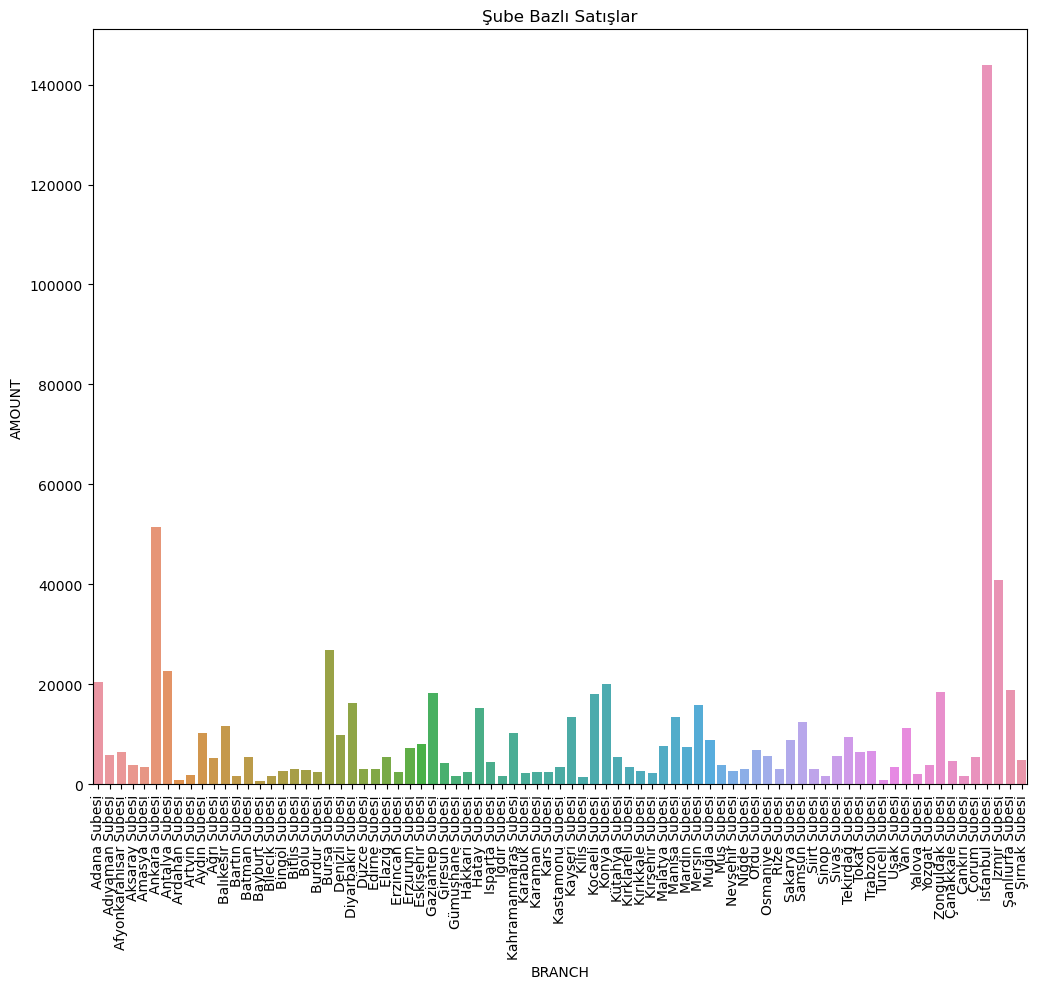

In [20]:
# Ay ve gün özelliklerini ekleme
df["month"] = df["STARTDATE"].dt.month
df["day"] = df["STARTDATE"].dt.day

# Şube bazlı satış analizi
branch_sales = df.groupby("BRANCH")["AMOUNT"].sum().reset_index()

# Görselleştirme
plt.figure(figsize=(20,10))

# Şube bazlı satışlar
plt.subplot(1, 2, 1)
sns.barplot(x="BRANCH", y="AMOUNT", data=branch_sales)
plt.title("Şube Bazlı Satışlar")
plt.xticks(rotation=90)

plt.tight_layout()

In [21]:
# En yüksek satış yapan şubeler
top_sales = df[df["BRANCH"].isin(["İstanbul Subesi", "İzmir Subesi", "Ankara Subesi"])]

# En yüksek satış yapan şubelerdeki ürünler
print("En yüksek satış yapan şubelerde satılan ürünler:\n", top_sales["ITEMNAME"].value_counts())

En yüksek satış yapan şubelerde satılan ürünler:
 EKMEK 250 GR                                            4841
DOMATES                                                 1793
PORTAKAL                                                1702
PATATES                                                 1694
TOZ SEKER                                               1605
SOGAN                                                   1380
OSMANCIK PIRINC KG.                                     1328
LIMON                                                   1256
MUZ                                                     1250
KIVIRCIK                                                1201
MAYDANOZ                                                1180
HAVUC                                                   1114
SİHİRLİ ELLER CİG KÖFTE 200GR                           1088
F NEFFIS SÜT YARIM YAĞLI 1 LT                            983
ULKER CIKOLATALI GOFRET 35GR                             861
YERLI BADEM                        

In [22]:
# En düşük satış yapan şubeler
other_sales = df[df["BRANCH"].isin(["Bayburt Subesi", "Ardahan Subesi", "Tunceli Subesi"])]
# En düşük satış yapan şubelerdeki ürünler
print("En düşük satış yapan şubelerde satılan ürünler:\n", other_sales["ITEMNAME"].value_counts())

En düşük satış yapan şubelerde satılan ürünler:
 EKMEK 250 GR                                          43
TOZ SEKER                                             26
PATATES                                               24
PORTAKAL                                              23
DOMATES                                               17
SOGAN                                                 16
OSMANCIK PIRINC KG.                                   13
MUZ                                                   11
YESIL SOGAN                                           10
TEREM PAKET MARGARIN 250 GR.                          10
KIVIRCIK                                               9
NESCAFE 3 IN 1 ARADA 18 GR                             9
PINAR AC BITIR SALAM 75 GR                             9
PINAR SUT 1 LT.                                        9
SİHİRLİ ELLER CİG KÖFTE 200GR                          8
YERLI BADEM                                            8
SALKIM DOMATES                         

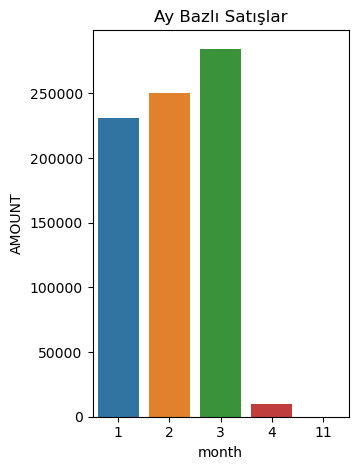

In [23]:
# Ay bazlı satış analizi
month_sales = df.groupby("month")["AMOUNT"].sum().reset_index()

# Ay bazlı satışlar
plt.subplot(1, 2, 2)
sns.barplot(x="month", y="AMOUNT", data=month_sales)
plt.title("Ay Bazlı Satışlar")

plt.tight_layout()
plt.show()

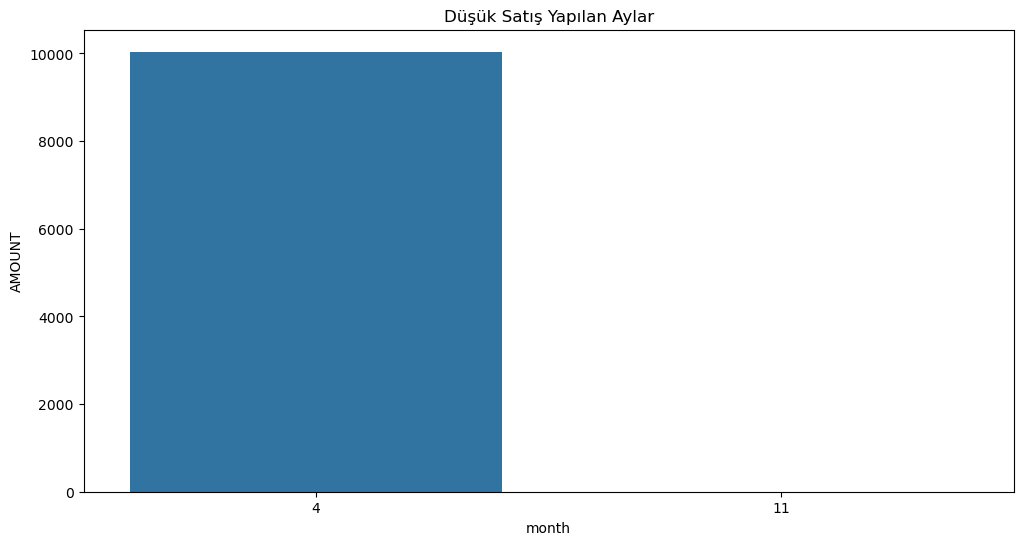

In [24]:
# Düşük satış yapılan ayları belirleme
low_sales_months = month_sales[month_sales["AMOUNT"] < month_sales["AMOUNT"].mean()]

# Sezonluk etkileri gözlemleme
plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="AMOUNT", data=low_sales_months)
plt.title("Düşük Satış Yapılan Aylar")
plt.show()

Günlük Toplam Satış:
     Gün  Toplam Satış
0     1  30105.697000
1     2  14803.838000
2     3  21067.785000
3     4  19295.269000
4     5  21988.474000
5     6  23740.426000
6     7  24065.853000
7     8  28892.523000
8     9  23832.713000
9    10  27452.864000
10   11  28415.455000
11   12  25076.508000
12   13  26236.796000
13   14  24480.344000
14   15  31108.586204
15   16  23789.379000
16   17  28204.553000
17   18  29166.295000
18   19  26217.716000
19   20  27433.984000
20   21  28359.293000
21   22  30345.712000
22   23  23185.613000
23   24  28668.755000
24   25  28494.693000
25   26  26896.231000
26   27  27578.910000
27   28  24809.477000
28   29  19603.429000
29   30  15587.446000
30   31  17327.212000


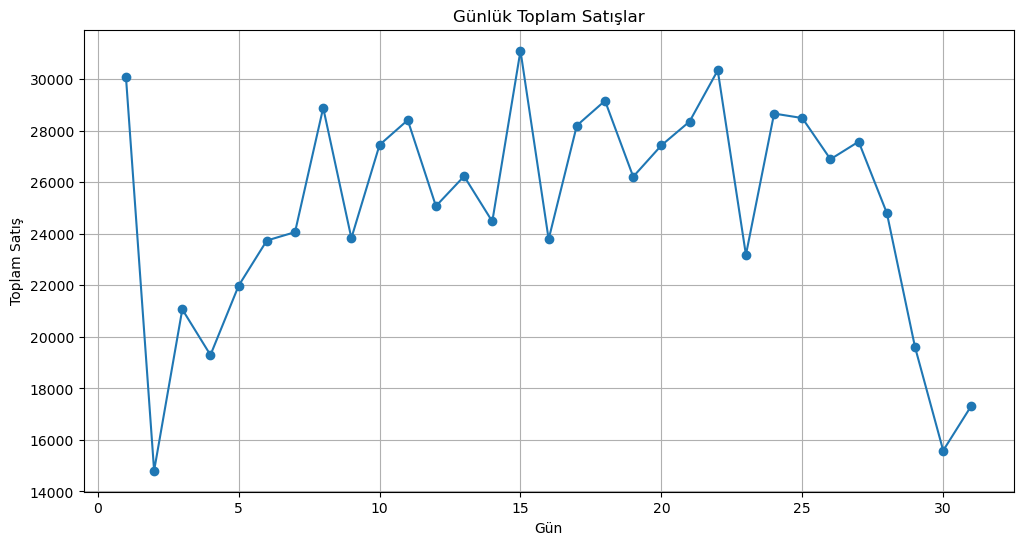

In [25]:
daily_sales = df.groupby("day")["AMOUNT"].sum().reset_index()
daily_sales.columns = ["Gün", "Toplam Satış"]
print("Günlük Toplam Satış:\n", daily_sales)
# Günlük satışlar
plt.figure(figsize=(12, 6))
plt.plot(daily_sales["Gün"], daily_sales["Toplam Satış"], marker='o')
plt.title('Günlük Toplam Satışlar')
plt.xlabel('Gün')
plt.ylabel('Toplam Satış')
plt.grid(True)
plt.show()

In [26]:
# Z-Score yöntemi ile anomalileri tespit etme
daily_sales['Z-Score'] = (daily_sales['Toplam Satış'] - daily_sales['Toplam Satış'].mean()) / daily_sales['Toplam Satış'].std()

# Z-Score değeri belirli bir eşik değerin üzerinde olanları anomali olarak kabul etme
anomalies = daily_sales[daily_sales['Z-Score'].abs() > 2]

print("Anomaliler:\n", anomalies)


Anomaliler:
     Gün  Toplam Satış  Z-Score
1     2     14803.838 -2.37973
29   30     15587.446 -2.19755


In [27]:
# Anomali olan günlerdeki satış temsilcilerini inceleme
anomalous_days = anomalies["Gün"].tolist()
salesmen_performance = df[df["day"].isin(anomalous_days)][["SALESMAN", "AMOUNT"]]

print("Anomali Günlerinde Satış Temsilcisi Performansı:\n", salesmen_performance.groupby("SALESMAN")["AMOUNT"].sum())

Anomali Günlerinde Satış Temsilcisi Performansı:
 SALESMAN
Abdullah BENGİN                7.000
Abdulsamet TACİM             262.941
Abdurrahman ÇAVDARLI           2.000
Adil ONDIN                    21.545
Adnan YAGIZ                  227.926
Aleyna ERÇETİN                12.000
Aleyna KASALAK                 4.805
Aleyna ÇUKUREL                15.641
Aliye GÖKDOĞAN               160.841
Aliye KÖZEN                    7.923
Aliye ÇUKURÇAYIR               1.000
Alper FETTAHOĞLU              10.795
Alper İNELBARS                 6.259
Alper İZMİRLİ                 93.393
Alya BARAN                    14.680
Arda ÇİNÇİN                   47.450
Arife DORAP                  717.875
Arin ÖZYÜREKOĞLU              97.946
Arzu GÖKKUŞ                   36.707
Arzu KARAKİTAPOĞLU           104.592
Arzu TUĞFAN                  200.117
Asel ÇELTİK                  294.558
Asiye DİDİNLİ                  5.546
Asiye SOYKATIRICI              1.000
Asmin BAŞPINAR                42.378
Asmin DİRİCANLI 

In [28]:
# Satış temsilcilerinin ortalama performansını analiz etme
salesman_performance = df.groupby("SALESMAN")["AMOUNT"].sum().reset_index()
average_performance = salesman_performance["AMOUNT"].mean()

# Performansı ortalamanın üzerinde olan temsilcileri belirleme
top_performers = salesman_performance[salesman_performance["AMOUNT"] > average_performance]

print("Ortalamanın Üzerinde Performans Gösteren Satış Temsilcileri:\n", top_performers)


Ortalamanın Üzerinde Performans Gösteren Satış Temsilcileri:
                       SALESMAN        AMOUNT
0              Abdullah BENGİN   1010.853000
1             Abdulsamet TACİM   6633.714000
3                   Adil ONDIN   1217.310000
4                  Adnan YAGIZ   6336.304000
8               Aleyna ÇUKUREL    910.762000
13              Aliye GÖKDOĞAN   3817.289000
17              Alper İNELBARS    940.324000
18               Alper İZMİRLİ   2357.992000
20                 Arda ÇİNÇİN   1394.210000
21                 Arife DORAP  23369.524000
23            Arin ÖZYÜREKOĞLU   2316.949000
25          Arzu KARAKİTAPOĞLU   1844.156000
26                 Arzu TUĞFAN   4625.367000
27                 Asel ÇELTİK   6914.787000
32              Asmin BAŞPINAR   1510.256000
34           Atakan KARACASULU   1860.729000
35            Ayaz SABANCIOĞLU    635.276000
37                 Ayfer NEFES   1190.619000
39                 Ayhan ÇERİT   5947.199000
43             Aylin ÇEVİKOĞLU   3225.

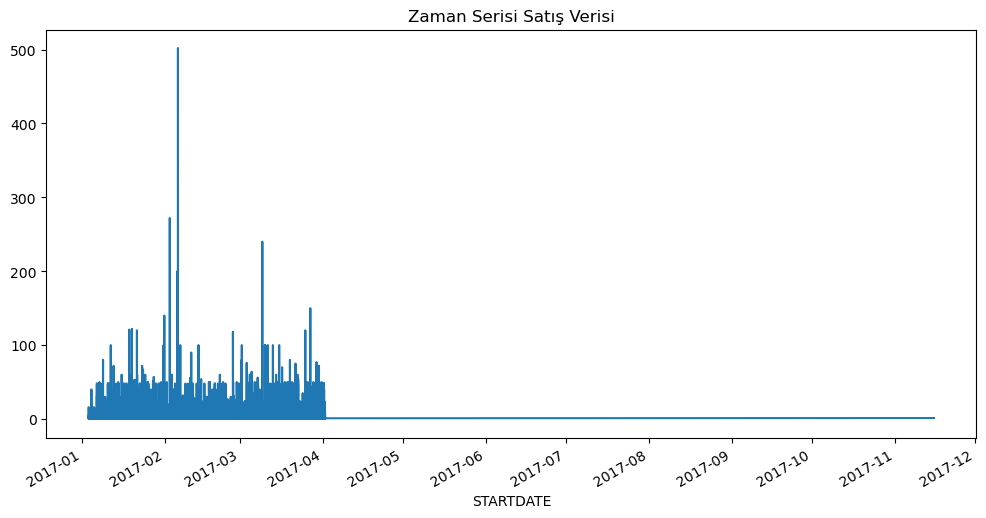

In [29]:
# Zaman serisi verisi
ts = df.set_index("STARTDATE")["AMOUNT"]

# Zaman serisi grafiği
plt.figure(figsize=(12, 6))
ts.plot()
plt.title("Zaman Serisi Satış Verisi")
plt.show()

In [30]:
label_encoder_gender = LabelEncoder()
df["GENDER"] = label_encoder_gender.fit_transform(df["GENDER"])

cols_to_encode = ["CLIENTCODE", "BRANCH", "ITEMNAME", "CATEGORY_NAME1", "CATEGORY_NAME2", "CATEGORY_NAME3", "CITY", "REGION", "BRANDCODE"]

encoder = ce.LeaveOneOutEncoder(cols=cols_to_encode, return_df=True)
df = encoder.fit_transform(df, df["AMOUNT"])

In [33]:
df.head()

,ID,ITEMCODE,ITEMNAME,FICHENO,DATE_,AMOUNT,PRICE,LINENETTOTAL,LINENET,BRANCHNR,BRANCH,SALESMAN,CITY,REGION,LATITUDE,LONGITUDE,CLIENTCODE,CLIENTNAME,BRANDCODE,BRAND,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER,month,day
0,11738,5863,1.000000,18456,2017-01-07,1.0,2.00,2.00,1.85,52,1.259118,Eyüp CİNE,1.259118,1.264723,40.8533,29.8815,1.203625,Sercan KIZILOK,1.121622,Unknown,1.839922,1.105677,1.081132,2017-01-08 16:16:11,2017-01-08 16:17:13,0,1,8
1,10537,8,3.651593,18105,2017-01-06,5.0,2.65,13.25,12.27,8,1.310872,İlhan ÖRENLİ,1.310872,1.282191,36.8841,30.7056,0.990800,İsmet ŞINGIR,1.644208,BrandA,1.839867,2.362484,2.527175,2017-01-07 11:04:34,2017-01-07 11:05:37,0,1,7
2,11335,5979,1.364055,18350,2017-01-03,1.0,0.40,0.40,0.37,40,1.266055,İsmet SARTIK,1.266055,1.264723,41.0053,28.9770,1.223270,Yağız KUBAL,1.293396,Unknown,1.282531,1.132575,1.151936,2017-01-04 14:00:03,2017-01-04 14:01:01,0,1,4
3,11336,5979,1.364055,18350,2017-01-03,1.0,0.40,0.40,0.37,40,1.266055,İsmet SARTIK,1.266055,1.264723,41.0053,28.9770,1.223270,Yağız KUBAL,1.293396,Unknown,1.282531,1.132575,1.151936,2017-01-04 14:00:03,2017-01-04 14:01:01,0,1,4
4,10115,12808,1.391892,18005,2017-01-05,1.0,0.40,0.40,0.37,41,1.264407,Gülten IŞLAK,1.264407,1.267083,38.4189,27.1287,1.000000,Habibe AYSAN,1.293396,Unknown,1.282531,1.132575,1.151936,2017-01-06 14:00:30,2017-01-06 14:01:03,1,1,6


# Satis Tahmin

# XGBoost modelini oluşturma ve eğitme


Ortalama Kare Hata: 1.2817029741375814


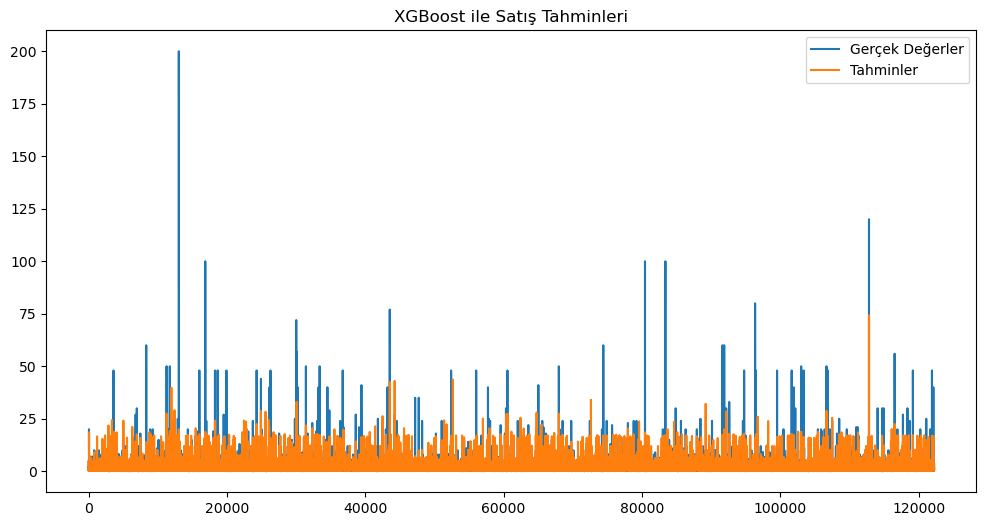

In [48]:
# Özellikler ve hedef değişkeni belirleme
X = df[["month", "day", "PRICE", "CATEGORY_NAME1", "CITY", "CLIENTCODE"]]
y = df["AMOUNT"]

# Normalizasyon için MinMaxScaler kullanma
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# XGBoost modelini oluşturma ve eğitme
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05)
model.fit(X_train, y_train)

# Tahminler yapma
predictions = model.predict(X_test)

# Model performansını değerlendirme
mse = mean_squared_error(y_test, predictions)
print(f"Ortalama Kare Hata: {mse}")

# Gerçek ve tahmin edilen satışları görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Gerçek Değerler")
plt.plot(predictions, label="Tahminler")
plt.legend()
plt.title("XGBoost ile Satış Tahminleri")
plt.show()

In [49]:
# Hiperparametre arama için parametreler belirleme
params = {
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5]
}

# GridSearchCV ile en iyi parametreleri bulma
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective="reg:squarederror"),
                           param_grid=params, scoring="neg_mean_squared_error", cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# En iyi parametrelerle modeli oluşturma
best_params = grid_search.best_params_
model = xgb.XGBRegressor(objective="reg:squarederror", **best_params)
model.fit(X_train, y_train)

# Tahminler yapma ve model performansını değerlendirme
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"En iyi parametreler ile Ortalama Kare Hata: {mse}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
En iyi parametreler ile Ortalama Kare Hata: 1.2405898367778359


# Random Forest modelini oluşturma ve eğitme


Random Forest ile Ortalama Kare Hata: 0.10720990383866597


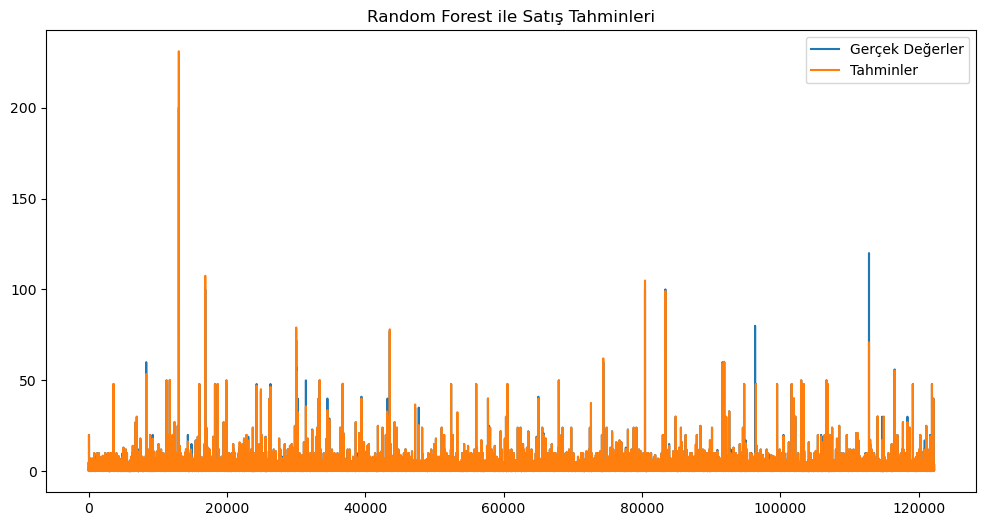

In [50]:
# Özellikler ve hedef değişkeni belirleme
X = df[["month", "day", "PRICE", "CATEGORY_NAME1", "CITY", "CLIENTCODE"]]
y = df["AMOUNT"]

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini oluşturma ve eğitme
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Tahminler yapma ve model performansını değerlendirme
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest ile Ortalama Kare Hata: {rf_mse}")

# Gerçek ve tahmin edilen satışları görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Gerçek Değerler")
plt.plot(rf_predictions, label="Tahminler")
plt.legend()
plt.title("Random Forest ile Satış Tahminleri")
plt.show()


In [ ]:
# Cross-validation ile model performansını değerlendirme
#cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#print("Cross-Validation Ortalama Kare Hata: ", -cross_val_scores.mean())

In [61]:
# Eğitim hatasını hesaplama
train_predictions = rf_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
print(f"Eğitim Hatası (MSE): {train_mse}")

# Test hatasını hesaplama
test_mse = mean_squared_error(y_test, rf_predictions)
print(f"Test Hatası (MSE): {test_mse}")

Eğitim Hatası (MSE): 108.96719273995387
Test Hatası (MSE): 0.10720990383866597


# CatBoost modelini oluşturma ve eğitme

CatBoost ile Ortalama Kare Hata: 0.4378510756095068


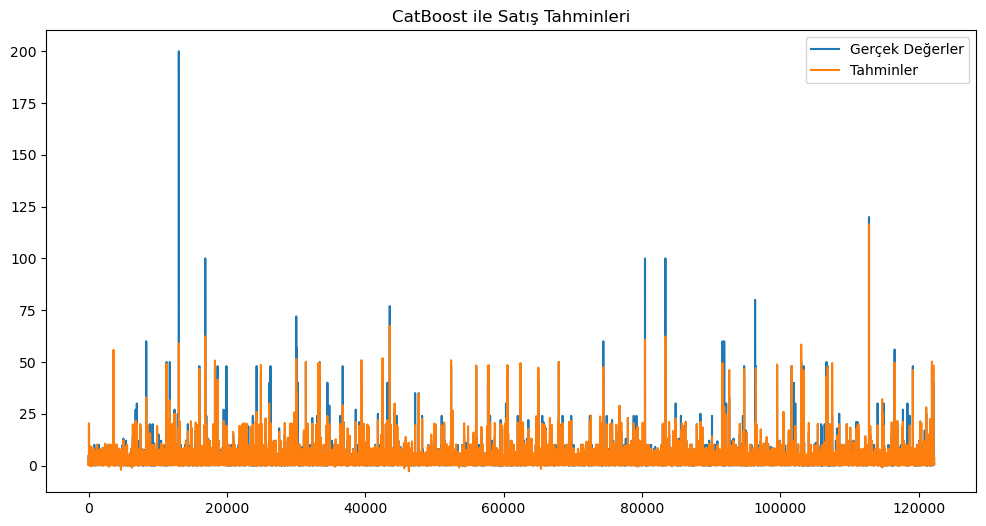

In [31]:
# Özellikler ve hedef değişkeni belirleme
X = df[["month", "day", "PRICE", "CATEGORY_NAME1", "CITY", "CLIENTCODE"]]
y = df["AMOUNT"]

# Normalizasyon için MinMaxScaler kullanma
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# CatBoost modelini oluşturma ve eğitme
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
cat_model.fit(X_train, y_train)

# Tahminler yapma
cat_predictions = cat_model.predict(X_test)

# Model performansını değerlendirme
cat_mse = mean_squared_error(y_test, cat_predictions)
print(f"CatBoost ile Ortalama Kare Hata: {cat_mse}")

# Gerçek ve tahmin edilen satışları görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Gerçek Değerler")
plt.plot(cat_predictions, label="Tahminler")
plt.legend()
plt.title("CatBoost ile Satış Tahminleri")
plt.show()


In [ ]:
# Cross-validation ile model performansını değerlendirme
cross_val_scores = cross_val_score(cat_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation Ortalama Kare Hata: ", -cross_val_scores.mean())

In [32]:
# Eğitim hatasını hesaplama
train_predictions = cat_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
print(f"Eğitim Hatası (MSE): {train_mse}")

# Test hatasını hesaplama
test_mse = mean_squared_error(y_test, cat_predictions)
print(f"Test Hatası (MSE): {test_mse}")

Eğitim Hatası (MSE): 0.24252526596280177
Test Hatası (MSE): 0.4378510756095068


In [ ]:
#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(cat_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Eğitim Hatası")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Hatası")
plt.xlabel("Eğitim Veri Boyutu")
plt.ylabel("Hata (MSE)")
plt.legend(loc="best")
plt.title("Öğrenme Eğrileri")
plt.show()

# LightGBM modelini oluşturma ve eğitme

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 488886, number of used features: 6
[LightGBM] [Info] Start training from score 1.269768
LightGBM ile Ortalama Kare Hata: 0.5672705699379459


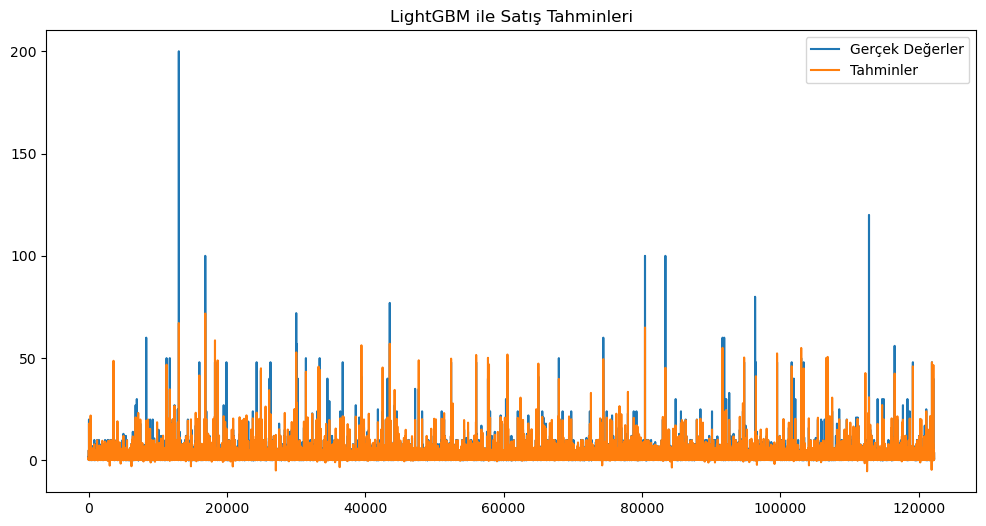

In [33]:
# Özellikler ve hedef değişkeni belirleme
X = df[["month", "day", "PRICE", "CATEGORY_NAME1", "CITY", "CLIENTCODE"]]
y = df["AMOUNT"]

# Normalizasyon için MinMaxScaler kullanma
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# LightGBM modelini oluşturma ve eğitme
lgb_model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.05)
lgb_model.fit(X_train, y_train)

# Tahminler yapma
lgb_predictions = lgb_model.predict(X_test)

# Model performansını değerlendirme
lgb_mse = mean_squared_error(y_test, lgb_predictions)
print(f"LightGBM ile Ortalama Kare Hata: {lgb_mse}")

# Gerçek ve tahmin edilen satışları görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Gerçek Değerler")
plt.plot(lgb_predictions, label="Tahminler")
plt.legend()
plt.title("LightGBM ile Satış Tahminleri")
plt.show()


In [34]:
# Eğitim hatasını hesaplama
train_predictions = lgb_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
print(f"Eğitim Hatası (MSE): {train_mse}")

# Test hatasını hesaplama
test_predictions = lgb_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Test Hatası (MSE): {test_mse}")


Eğitim Hatası (MSE): 0.838065504887786
Test Hatası (MSE): 0.5672705699379459


In [ ]:
# CatBoost modelini kaydetme
joblib.dump(cat_model, "catboost_model.pkl")

# LightGBM modelini kaydetme
joblib.dump(lgb_model, "lightgbm_model.pkl")

In [ ]:
# CatBoost modelini yükleme
cat_model = joblib.load("catboost_model.pkl")

# LightGBM modelini yükleme
lgb_model = joblib.load("lightgbm_model.pkl")
